In [3]:
# !pip install numpy matplotlib pandas tqdm

In [51]:
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
with open("metrics.json", encoding="utf-8") as f:
    data = json.load(f)

In [49]:
df = pd.DataFrame(data)
df["size"] = df["count"] * df["block_size"]
df.sort_values("duration", ascending=False)

,duration,value,block_size,count,runtime,size
176,0.225694,0.250000,1024,100000,C++,102400000
179,0.154978,0.341293,1024,100000,clBLASt,102400000
178,0.127773,0.341294,1024,100000,OpenCL Reduction,102400000
172,0.119569,0.146193,512,100000,C++,51200000
174,0.062230,0.170641,512,100000,OpenCL Reduction,51200000
...,...,...,...,...,...,...
33,0.000005,0.000034,1024,10,OpenBLAS,10240
29,0.000005,0.000017,512,10,OpenBLAS,5120
57,0.000005,0.000043,128,100,OpenBLAS,12800
0,0.000003,0.000000,4,10,C++,40


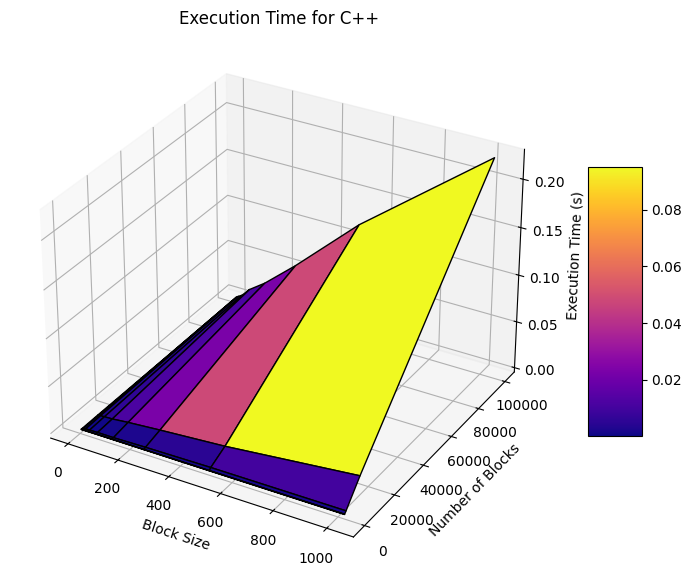

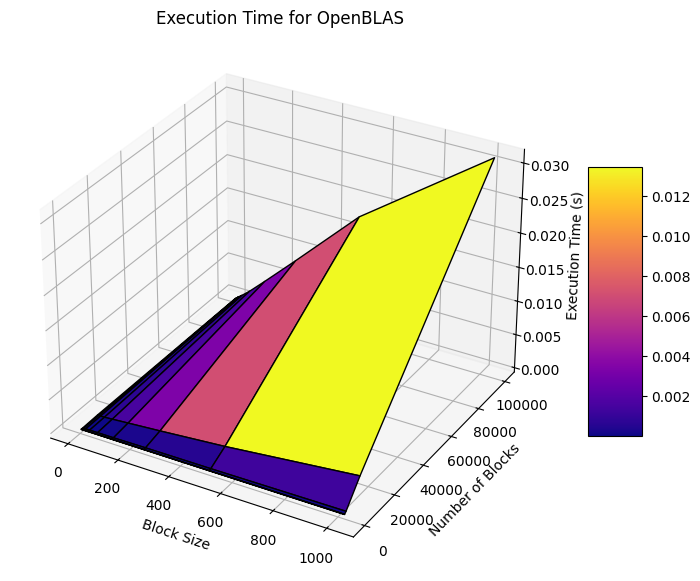

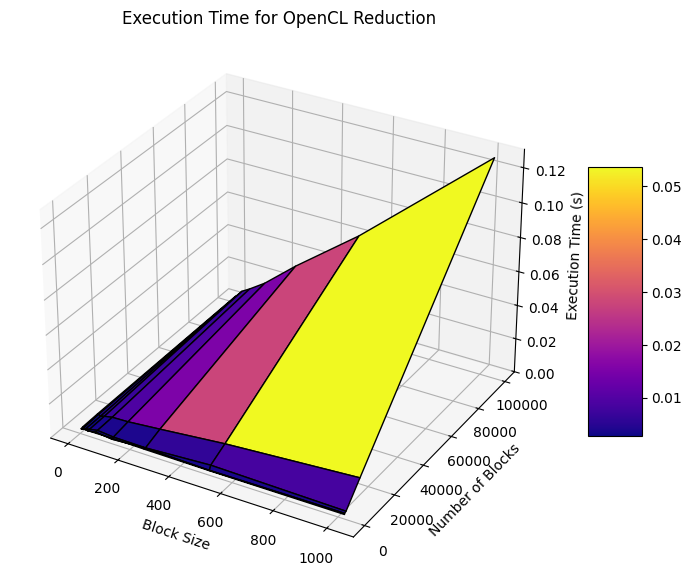

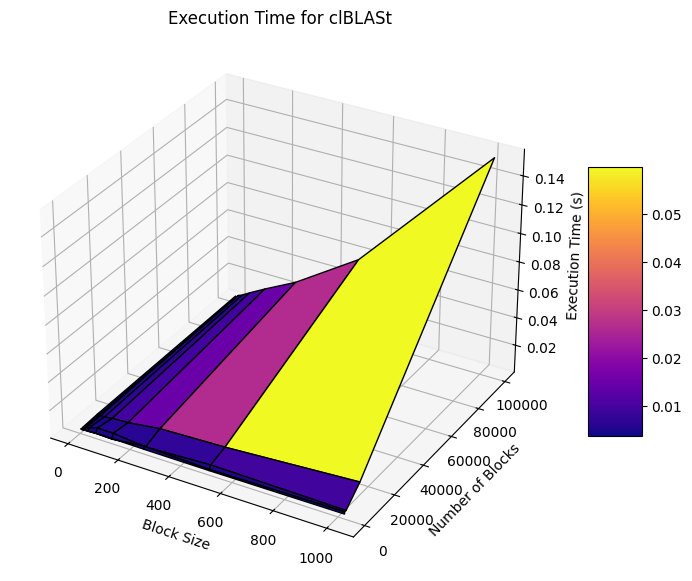

In [50]:
runtimes = df["runtime"].unique()

for target_runtime in runtimes: 
    # target_runtime = 'OpenCL Reduction'
    df_filtered = df[df['runtime'] == target_runtime]

    block_sizes = sorted(df_filtered['block_size'].unique())
    counts = sorted(df_filtered['count'].unique())

    X, Y = np.meshgrid(block_sizes, counts)
    Z = np.zeros_like(X, dtype=float)

    for i, count in enumerate(counts):
        for j, block in enumerate(block_sizes):
            match = df_filtered[
                (df_filtered['block_size'] == block) &
                (df_filtered['count'] == count)
            ]
            if not match.empty:
                Z[i, j] = match['duration'].values[0]
            else:
                Z[i, j] = np.nan

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='k')

    ax.set_xlabel('Block Size')
    ax.set_ylabel('Number of Blocks')
    ax.set_zlabel('Execution Time (s)')
    ax.set_title(f'Execution Time for {target_runtime}')
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()
